In [1]:
import sys
from importlib import reload
import pandas as pd
from sklearn.externals import joblib

DATA_DIR = r"C:\_DATA\experimentation\HC_Default_Risk/"

Load the TCXP library we developed:

In [23]:
sys.path.append( '../py' )
import  tcxp 
reload( tcxp ) 

<module 'tcxp' from '../py\\tcxp.py'>

Load previously trained random forest classifier:

In [3]:
rfc = joblib.load( DATA_DIR + 'rfc1.pkl' ) 
type( rfc )

sklearn.ensemble.forest.RandomForestClassifier

Load some test data (wasn't used for training of rfc)

In [4]:
X_test = pd.read_pickle( DATA_DIR + 'x_test.pkl' ) 

In [5]:
pd.set_option( 'display.max_columns', 200 )
X_test.head(10)

,age,days_employed,days_last_phone_change,days_id_publish,amt_goods_price,amt_credit,amt_annuity,education__higher,days_registration,gender__f,region_population_relative,gender__m,income__working,region_rating_client_w_city,region_rating_client,amt_income_total,education__secondary,own_car_age,flag_document_3,totalarea_mode,hour_appr_process_start,livingarea_avg,livingarea_medi,livingarea_mode,apartments_avg,years_beginexpluatation_mode,flag_own_car,def_30_cnt_social_circle,amt_req_credit_bureau_year,landarea_avg,years_beginexpluatation_medi,years_beginexpluatation_avg,apartments_medi,apartments_mode,landarea_mode,basementarea_medi,reg_city_not_work_city,basementarea_avg,fam_status__married,landarea_medi,income__pensioner,basementarea_mode,reg_city_not_live_city,obs_60_cnt_social_circle,commonarea_medi,commonarea_mode,commonarea_avg,def_60_cnt_social_circle,obs_30_cnt_social_circle,livingapartments_avg,nonlivingarea_avg,livingapartments_medi,livingapartments_mode,floorsmax_avg,cnt_fam_members,nonlivingarea_medi,years_build_medi,years_build_avg,flag_emp_phone,name_contract_type__cash_loans,occupation_type__laborers,nonlivingarea_mode,years_build_mode,entrances_avg,floorsmax_medi,name_contract_type__revolving_loans,entrances_medi,entrances_mode,cnt_children,elevators_avg,fam_status__single_not_married,flag_work_phone,floorsmin_avg,amt_req_credit_bureau_qrt,elevators_medi,floorsmax_mode,nonlivingapartments_avg,floorsmin_medi,occupation_type__drivers,fam_status__civil_marriage,emergencystate_mode__no,housing__house_apartment,nonlivingapartments_mode,occupation_type__sales_staff,floorsmin_mode,nonlivingapartments_medi,occupation_type__low_skill_laborers,elevators_mode,live_city_not_work_city,housing__with_parents
sk_id_curr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
400838,-14029,-2802,-1887.0,-2202,450000.0,450000.0,21888.0,True,-3203.0,True,0.008068,False,True,3,3,135000.0,False,9.0,True,0.0688,5,0.0745,0.0749,0.0731,0.0876,0.9816,False,0.0,0.0,0.0481,0.9816,0.9816,0.0864,0.0840,0.0458,0.0758,False,0.0763,False,0.0487,False,0.0746,False,0.0,0.0208,0.0190,0.0211,0.0,0.0,0.0756,0.0036,0.0761,0.0771,0.1667,3.0,0.0031,0.7585,0.7552,True,True,False,0.0011,0.7648,0.1379,0.1667,False,0.1379,0.1379,2,0.00,True,False,0.2083,2.0,0.00,0.1667,0.0,0.2083,False,False,False,True,0.0,False,0.2083,0.0,False,0.0000,0,False
362719,-14279,-5083,-2015.0,-3316,1125000.0,1288350.0,41692.5,False,-3001.0,True,0.025164,False,False,2,2,540000.0,True,1.0,True,0.0165,14,0.0183,0.0186,0.0139,0.0186,0.9677,True,0.0,0.0,0.0268,0.9677,0.9677,0.0187,0.0168,0.0218,0.0219,False,0.0219,True,0.0273,False,0.0198,False,6.0,0.0105,0.0100,0.0104,0.0,7.0,0.0151,0.0000,0.0154,0.0147,0.0625,2.0,0.0000,0.5639,0.5580,True,True,False,0.0000,0.5753,0.0690,0.0625,False,0.0690,0.0690,0,0.00,False,False,0.1042,0.0,0.00,0.0417,0.0,0.1042,False,False,True,True,0.0,False,0.0833,0.0,False,0.0000,0,False
441415,-10802,-2067,-885.0,-3226,450000.0,450000.0,24412.5,False,-368.0,True,0.026392,False,True,2,2,135000.0,False,12.0,True,0.0505,19,0.0642,0.0654,0.0669,0.0825,0.9752,True,1.0,0.0,0.0833,0.9752,0.9752,0.0833,0.0840,0.0852,0.0635,False,0.0635,False,0.0847,False,0.0659,False,1.0,0.0208,0.0190,0.0211,0.0,1.0,0.0756,0.0000,0.0761,0.0771,0.1667,4.0,0.0000,0.7585,0.7552,True,True,False,0.0000,0.7648,0.1379,0.1667,False,0.1379,0.1379,2,0.00,False,False,0.2083,0.0,0.00,0.1667,0.0,0.2083,False,True,True,False,0.0,True,0.2083,0.0,False,0.0000,0,False
429016,-23667,365243,-1770.0,-4091,1125000.0,1125000.0,60070.5,False,-5808.0,True,0.018850,False,False,2,2,225000.0,True,9.0,True,0.0688,10,0.0745,0.0749,0.0731,0.0876,0.9816,False,0.0,0.0,0.0481,0.9816,0.9816,0.0864,0.0840,0.0458,0.0758,False,0.0763,True,0.0487,True,0.0746,False,2.0,0.0208,0.0190,0.0211,0.0,2.0,0.0756,0.0036,0.0761,0.0771,0.1667,2.0,0.0031,0.7585,0.7552,False,True,False,0.0011,0.7648,0.1379,0.1667,False,0.1379,0.1379,0,0.00,False,False,0.2083,0.0,0.00,0.1667,0.0,0.2083,False,False,

Compute explanations for first samples:

In [6]:
tc_exps, p0 = tcxp.rf_explain( rfc, X_test[:1000] ) 

In [7]:
ct = ('red', 'green') 

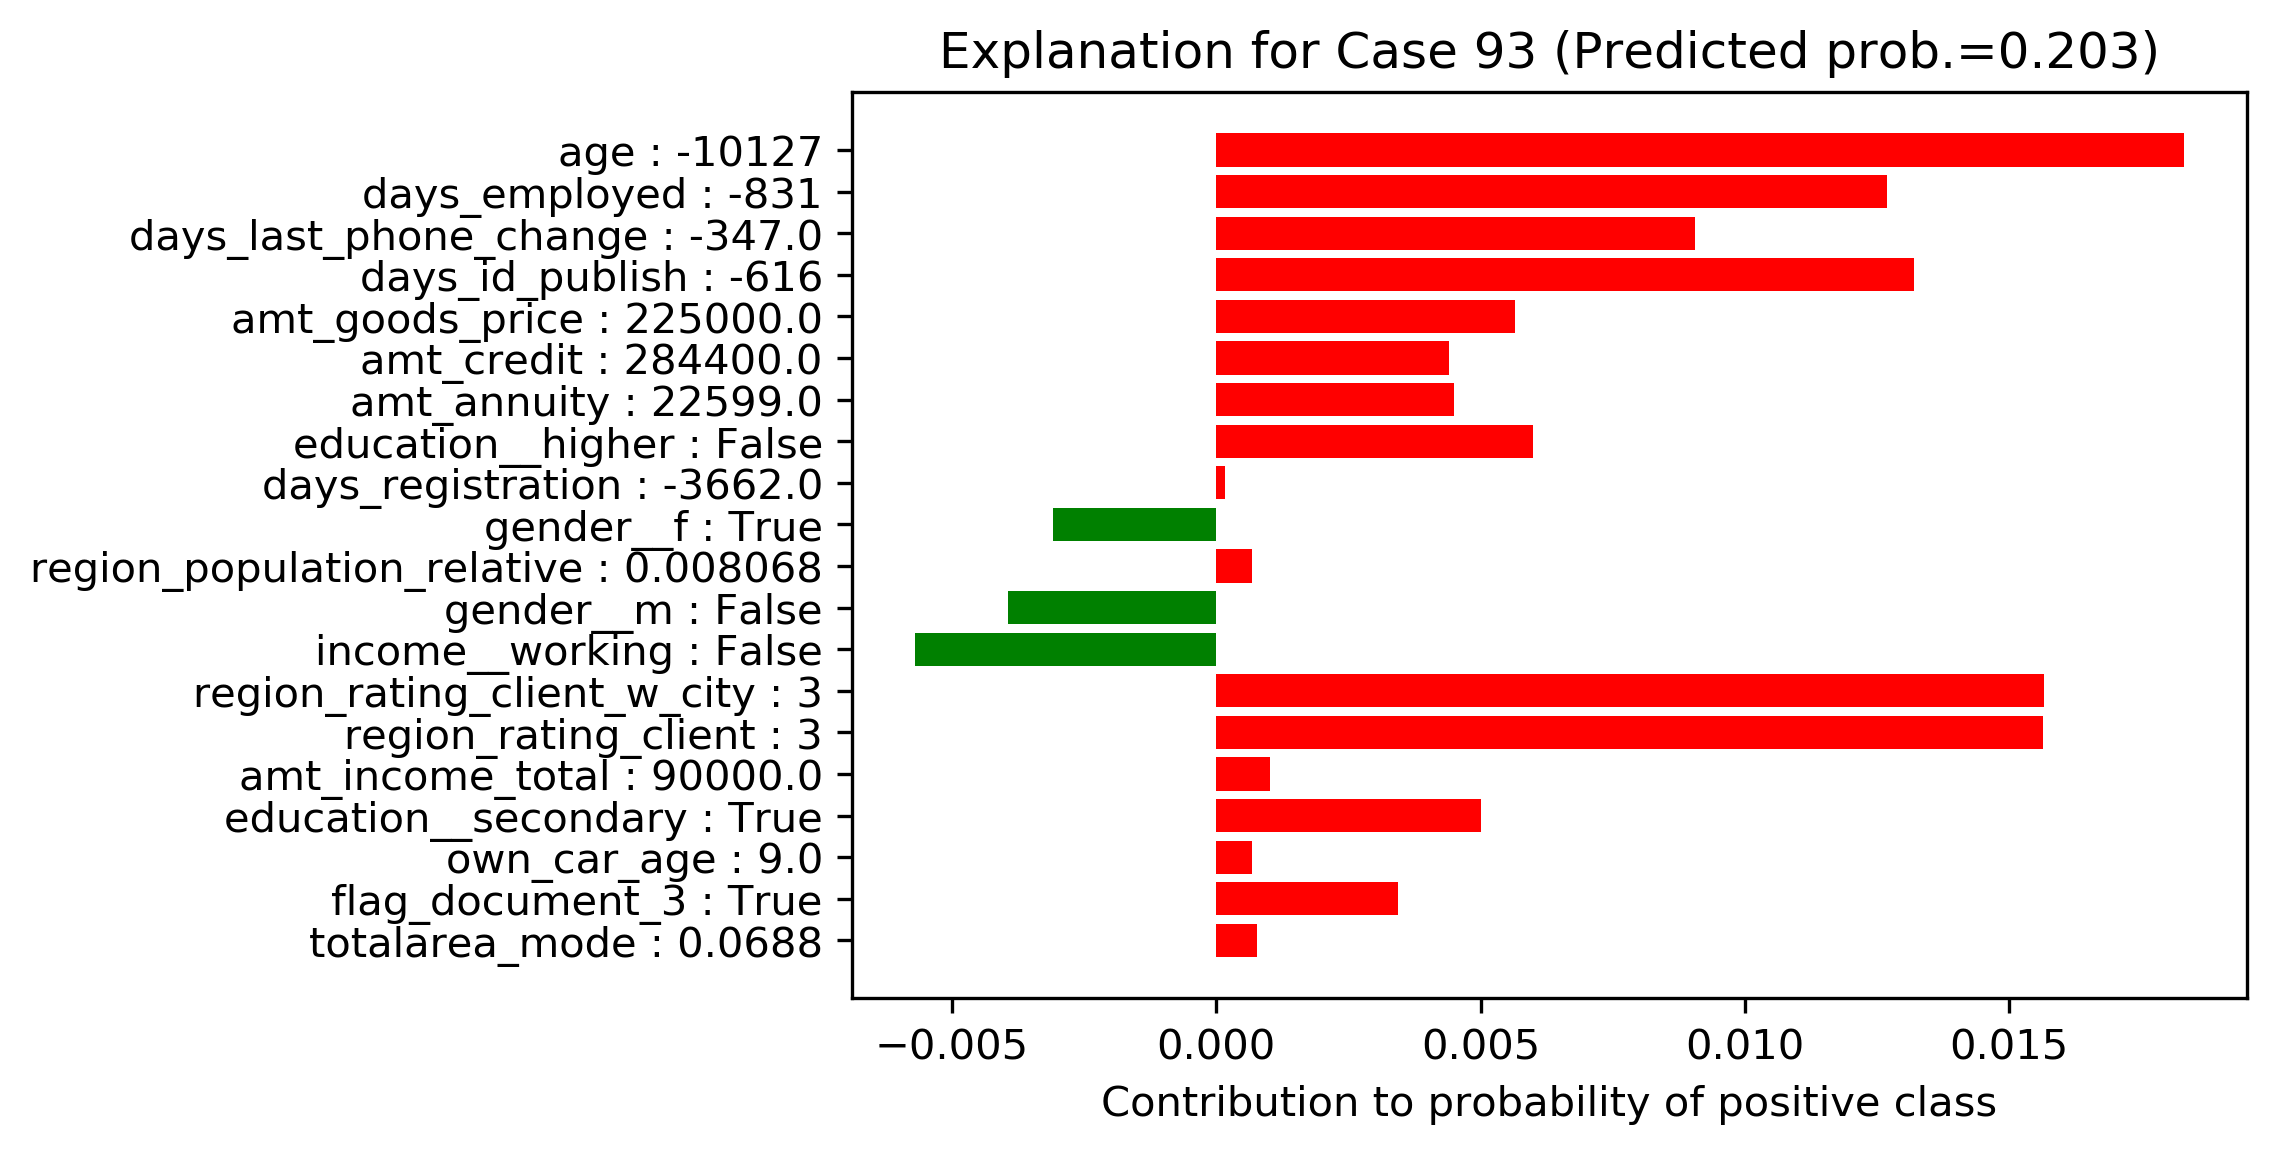

In [24]:
i = 93
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns, X_test.iloc[i,:], 'Case %d' % i, color_theme=ct)

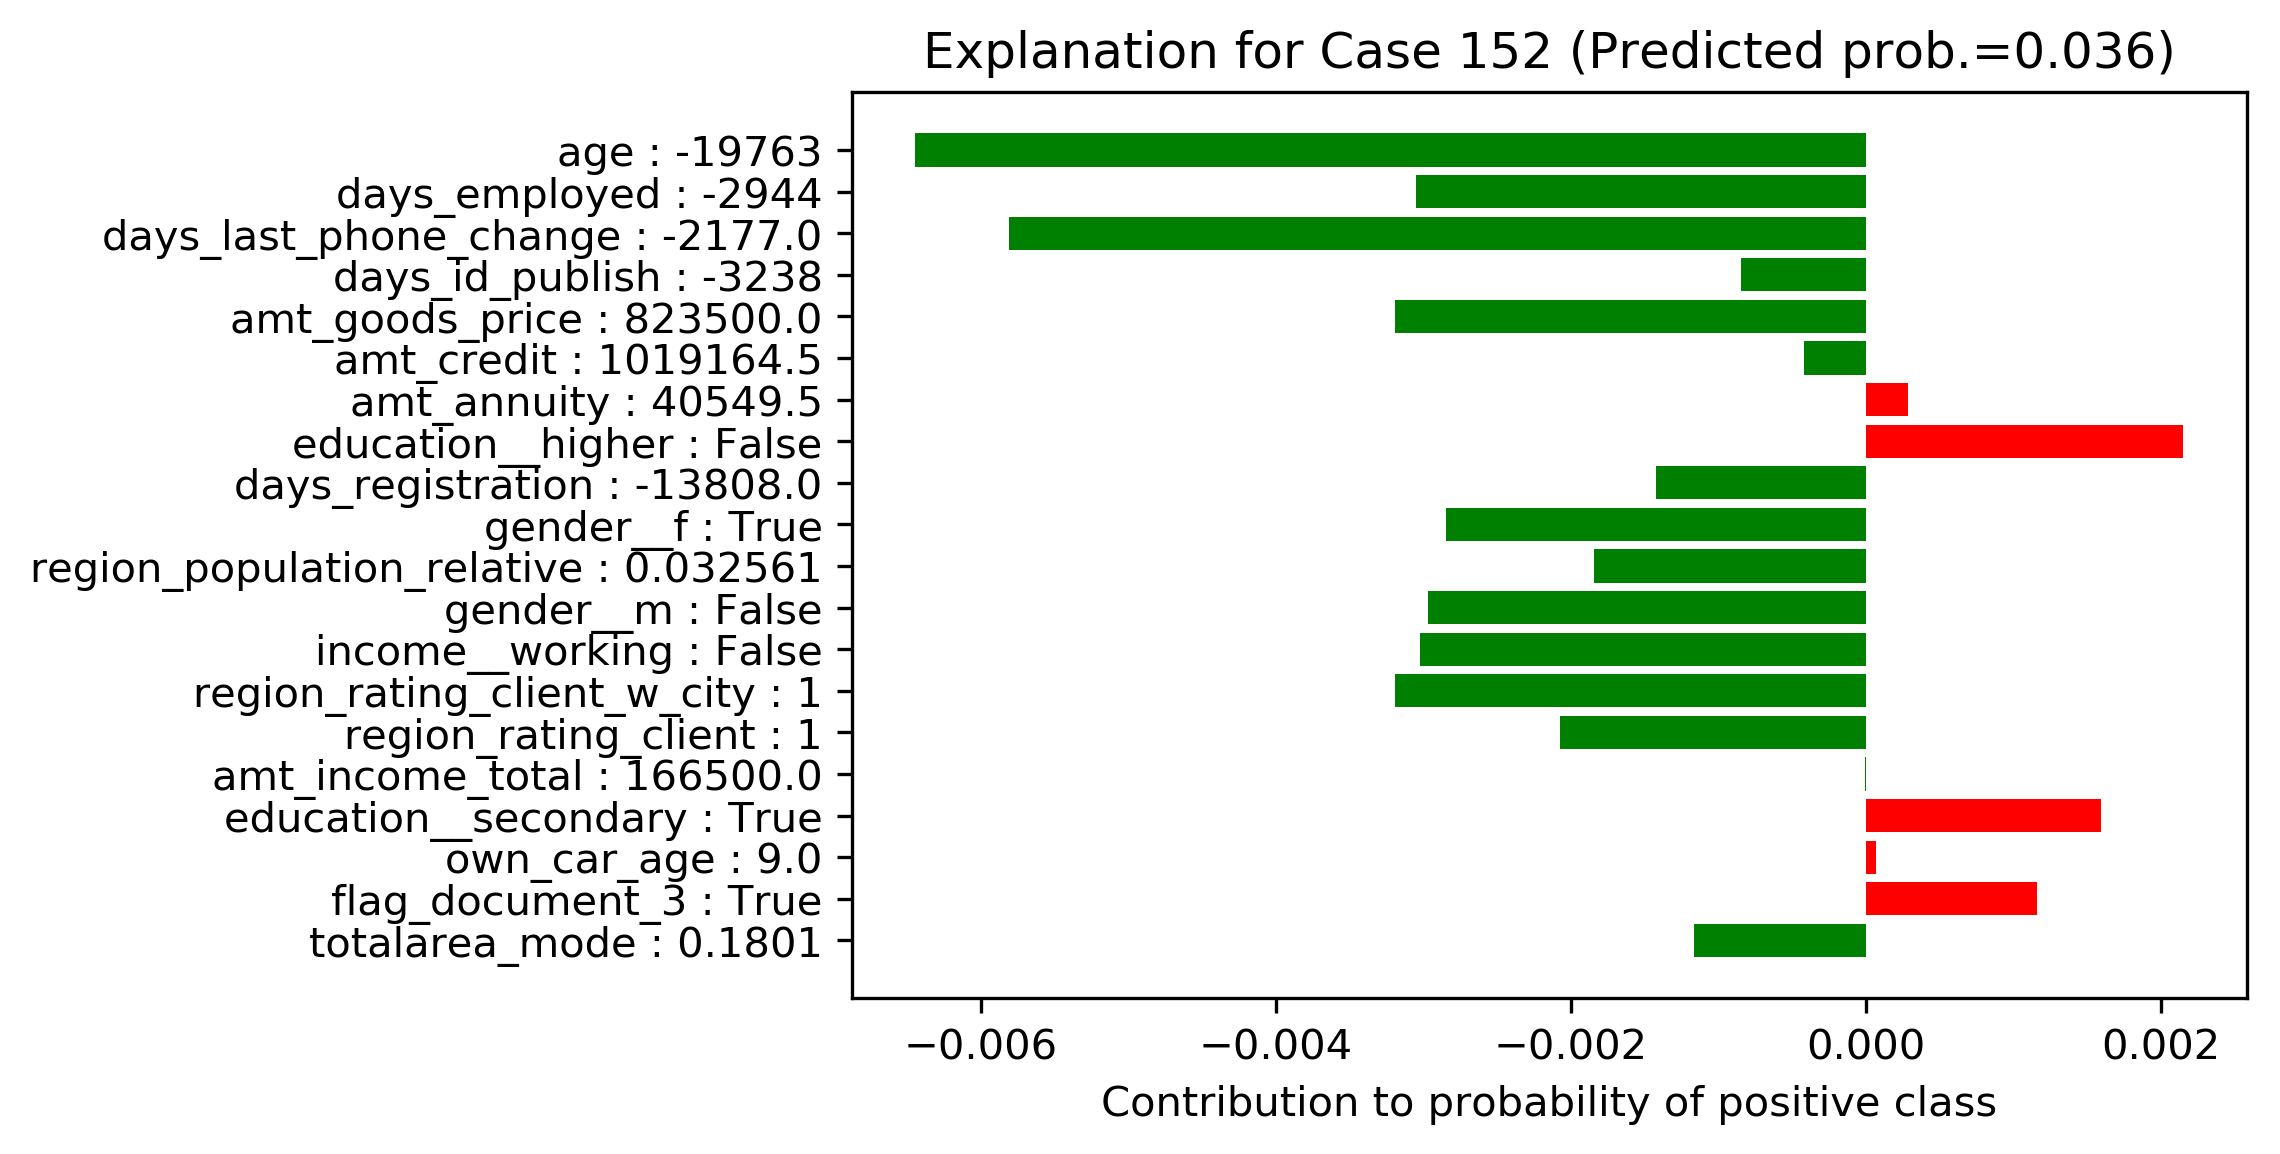

In [25]:
i = 152
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns,  X_test.iloc[i,:], 'Case %d' % i, color_theme=ct)

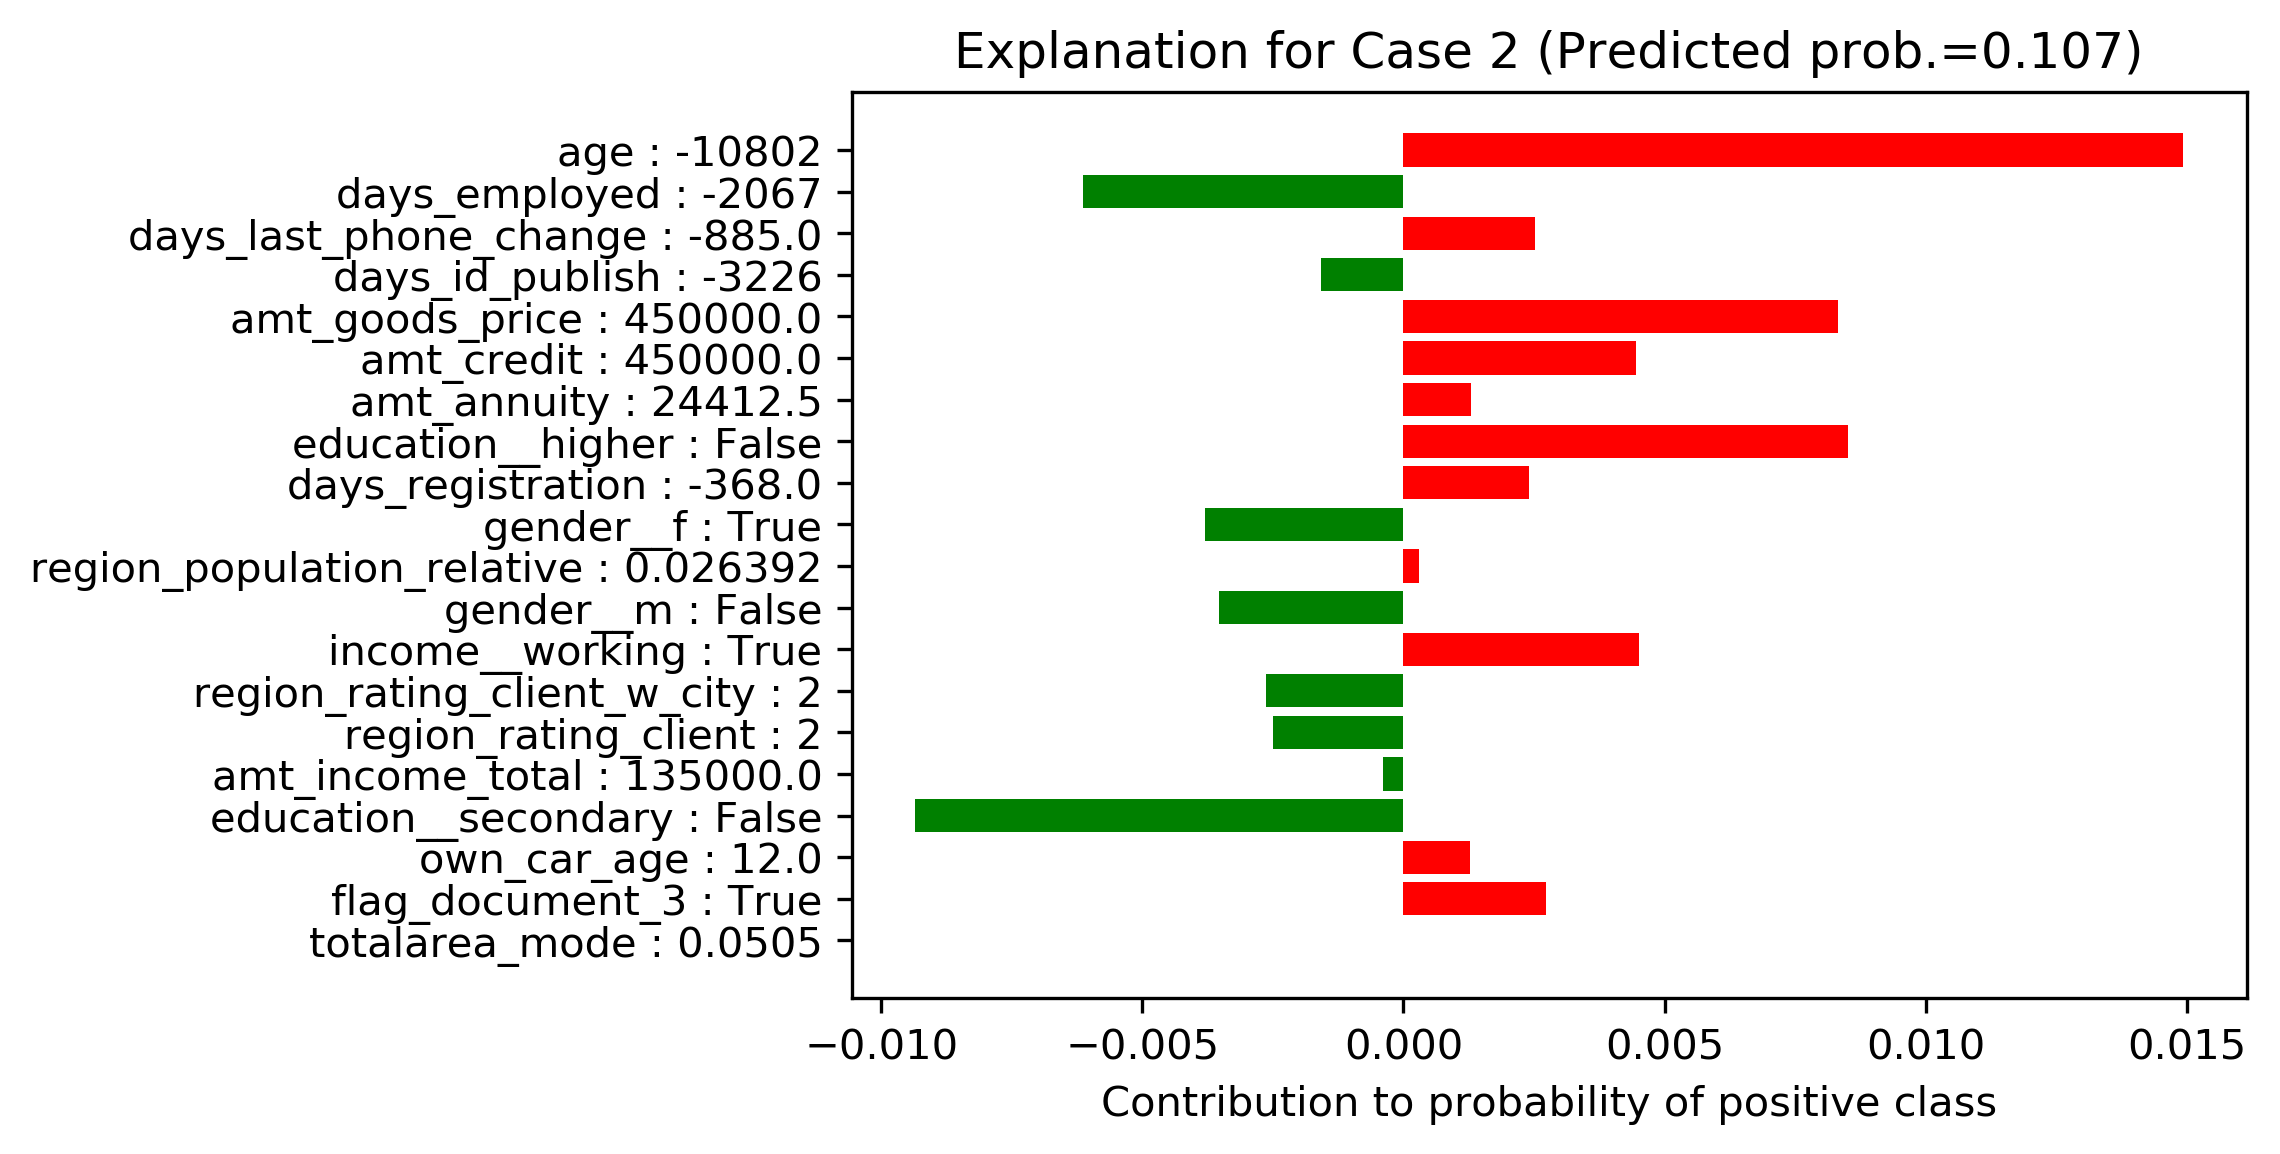

In [26]:
i = 2
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns,  X_test.iloc[i,:], 'Case %d' % i, color_theme=ct)